The motive of this notebook is to test the trip based feature creation. Meaning, attributes like `elapsed_tm` and `outlier detection` that needs to implemented on the basis of trip, will be done through functions. These functions will then form part of a **module** and will be implemented on scale, to all the files.

Created on = 27 Mar 2019

Completed on = 27 March 2019

Conclusion =  The Outlier detection and trip number and elapsed time columns were created.

In [34]:
%autosave 60

Autosaving every 60 seconds


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

In [36]:
plt.rcParams["figure.figsize"] = (8, 8)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
sns.set_style("darkgrid")
os.chdir("/home/CWSHPMU2316/Desktop/EVRangePrediction/data/raw")

In [37]:
data = pd.read_csv("358272088715191_2019-01-16_cb.csv")

In [38]:
data.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702400,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
1,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702500,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
2,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702600,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
3,DEFREG:358272088715191,Trip not started,NaN,76.951081,28.390039,1.0,NaN,1547605702700,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,

## Trip Number
Filling the column with `tp` with the current trip vehicle is in. This will allow us `group_by` the observation based on trip number and perform trip specific feature engineering.

In [39]:
def trip_number(dataframe):
    """
    input - dataframe
    output - list
    
    finding out the index across the data, wherever new trip starts
    Logic used - whenever the value of EVIGC changes AND difference b/w two consecutive timestamps is greater than 100, 
    new trip starts.
    """
    new_trip = []                  # initializing the list
    new_trip.append(data.index[0]) # appending the first value as it signify the first trip
    for i in range(1, len(data)):
        if (data.EVIGC[i] - data.EVIGC[i-1] >= 1) and (data.tm[i] - data.tm[i-1]) > 100:
            new_trip.append(data.index[i])
            
    # the terminating value of the dataset. This value will be used as upper limit for last trip        
    new_trip.append(len(data))     
    
    # making a list that fills that repeatedly fills the trip number for the length of data we have
    trip_number_list = []                
    for k in range(0, len(new_trip)-1):
        trip_number = k+1
        lower_limit = new_trip[k]
        upper_limit = new_trip[k+1]
        for i in range(lower_limit, upper_limit):
            trip_number_list.append(trip_number)
            
    return trip_number_list

In [40]:
def elapsed_time(dataframe):
    """
    input - dataframe
    output - list
    this function takes the dataframe and outputs the elapsed time list.
    logic = current timestamp - start time stamp (where trip starts)
    """
    elapsed_tm = []
    new_trip = []                  # initializing the list
    new_trip.append(data.index[0]) # appending the first value as it signify the first trip

    for i in range(1, len(data)):
        if (data.EVIGC[i] - data.EVIGC[i-1] >= 1) and (data.tm[i] - data.tm[i-1]) > 100:
            new_trip.append(data.index[i])
    new_trip.append(len(data))

    for i in range(0, len(new_trip) - 1):
        init_trip = new_trip[i]
        stop_trip = new_trip[i+1]
        for k in range(init_trip, stop_trip):
            temp = data.tm[k] - data.tm[init_trip]
            elapsed_tm.append(temp)
            
    return elapsed_tm

In [41]:
def replace_df(dataframe, attribute_name, list_name):
    """
    inputs - dataframe name, list name (should be of same length), name of the predictor to be replaced
    output - dataframe with replaced column
    """
    col_list = list(dataframe.columns)
    loc = col_list.index(attribute_name)
    dataframe = dataframe.drop(columns = attribute_name)
    dataframe.insert(loc, attribute_name, list_name)
    return dataframe

In [42]:
trip_number_list = trip_number(data)
elapsed_list = elapsed_time(data)

df = replace_df(data, "tp", trip_number_list)
df = replace_df(df, "tm", elapsed_list)

In [43]:
def outlier_imputation(dataframe, window_size):
    """
    input - dataframe
    output - dataframe with outlier imputation
    """
    outlier_dictionary = {
        "EVTRQ": [-200, 200],
        "EVDDC": [12.5, 15.6],
        "EVRGT": [-200, 200],
        "EVBOA_MIN": [-100,512],
        "EVBOA_MAX": [-100, 512],
        "EVBOA_AVG": [-100, 512],
        "EVBOV_MIN": [0, 512],
        "EVBOV_MAX": [0, 512],
        "EVBOV_AVG": [0, 512],
        "EVPWA_MAX": [0,12.7],
        "EVBMA_Latest" : [-40,86.5],
        "EVIRP": [0,4000] 
    }
    
    for i in outlier_dictionary:
        arr = dataframe[i].values
        new_list = arr[:window_size]
        new_list = list(new_list)
        
        lower_limit = outlier_dictionary[i][0]
        upper_limit = outlier_dictionary[i][1]
        for j in range(window_size, len(arr)):
            w_data = arr[(j - window_size): j]
            median = statistics.median(w_data)
            
            
            if w_data[-1] < lower_limit or w_data[-1] > upper_limit:
                new_list.append(median)

            else:
                new_list.append(w_data[-1])
            
        for k in range(0, window_size):
            if new_list[k]< lower_limit or new_list[k]>upper_limit:
                new_list[k] = statistics.median(arr)
                
        dataframe = replace_df(dataframe, i, new_list)
    
    return dataframe

In [44]:
df.head()

,mo,tp,dr,ln,lt,hd,sp,tm,mn,mt,mh,ml,mr,SpeedLimit,hdop,numsat,IMEI,trip_id,EVTmg,EVVer,EVCfg,EVIGS,EVIGC,EVVSP,EVDRG,EVGPO,EVBRP,EVCFN,EVICR,EVTRQ,EVCST,EVDDC,EVBCA,EVBBV,EVDR1,EVDR2,EVRGT,EVACP,EVBAP_Latest,EVBAP_Max,EVBAP_Min,EVCCS,EVCM1,EVCTM,EVCCU,EVCSD,EVVCE,EVPSC_Latest,EVPSC_Max,EVPSC_Min,EVVOU,EVCOU,EVCPV,EVVCD,EVCCD,EVCSC,EVEST,EVCHS,EVR10,EVRMN,EVHVS,EVV12,EVPWA_MAX,EVPWA_MIN,EVMCV_MAX,EVMCV_MIN,EVSMA_MAX,EVSMA_MIN,EVSMI_MAX,EVSMI_MIN,EVSOH,EVBMA_Latest,EVBMA_Max,EVBMA_Min,EVBMI_Latest,EVBMI_Max,EVBMI_Min,EVBOA_AVG,EVBOA_MAX,EVBOA_MIN,EVBOV_AVG,EVBOV_MAX,EVBOV_MIN,EVIRP,EVIRN,EVSOMA,EVSOMI,EVIGM_Latest,EVIGM_Max,EVIGM_Min,EVCOM_Latest,EVCOM_Max,EVCOM_Min,EVICO_Latest,EVICO_Max,EVICO_Min,EVIRT_Latest,EVIRT_Max,EVIRT_Min,EVIDC,EVMGT,EVMGS,EVMGF,EVMGR,EVIND,EVICM,EVCPW,EVCPF_Latest,EVCPF_Max,EVCPF_Min,EVCI1_Latest,EVCI1_Max,EVCI1_Min,EVCI2_Latest,EVCI2_Max,EVCI2_Min,EVCBD_Latest,EVCBD_Max,EVCBD_Min,EVCRP,EVACV_AVG,EVACV_Max,EVACV_Min,EVCDO_AVG,EVCDO_Max,EVCDO_Min,EVCCO_AVG,EVCCO_Max,EVCCO_Min,EVSDT,EVCHC,EVCHT_AVG,EVCHT_Max,EVCHT_Min,EVCHE,EVDI1,EVDI2,EVDIT,EVOII,EVDOA,EVDOV,EVDSE,EVACS,EVPSS,EVMSC,EVRER,EVDRV,EVMTR,EVODO,EVOAS,EVHTR,EVACE,EVTRE,EVCLC,EVBFN,EVIST,EVHTP_AVG,EVHTP_Max,EVHTP_Min,EVVBT,EVGSM,EVACO_X,EVACO_Y,EVACO_Z,Unnamed: 164
0,DEFREG:358272088715191,1,NaN,76.951081,28.390039,1.0,NaN,0,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
1,DEFREG:358272088715191,1,NaN,76.951081,28.390039,1.0,NaN,100,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
2,DEFREG:358272088715191,1,NaN,76.951081,28.390039,1.0,NaN,200,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,14,0,27,13.9,0,0.0,46.225,52.9,0,-65532,0,2572,13.0,0,13.7,50.0,55,0,0,0,0,0,137,0,-820,654,23,NaN
3,DEFREG:358272088715191,1,NaN,76.951081,28.390039,1.0,NaN,300,76.951081,28.390039,87.78603,1036056339,5,30.0,1.8,7,358272088715191,Trip not started,P,M1_POCEV.0,NaN,1,246,0.0,87,10,0,0,1,0.0,1,13.9,0,60.5,0,0,0,0.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,13.8,0,0,3.89,3.88,78.4,78.4,78.1,78.1,100,15.5,15.5,15.5,15.0,15.0,15.0,0.5,-505.0,-357.0,257.75,174.0,16180.0,1790,1790,100,100,14,-50,2,14,106,202,15,-50,-16,14,88,212,0.0,-0.1,0,0.0,0.0,260,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [45]:
df = outlier_imputation(df, 40)

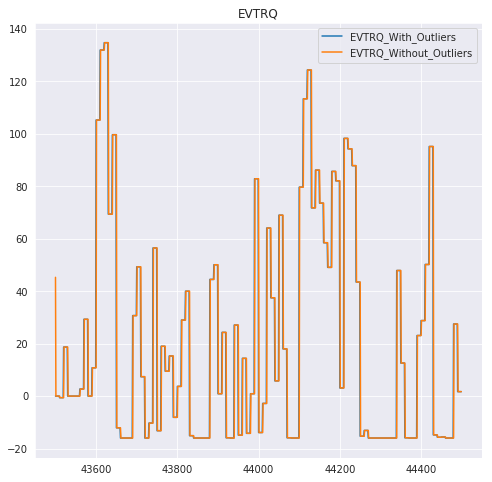

In [46]:
plt.plot(data["EVTRQ"][43500:44500], label = "EVTRQ_With_Outliers")
plt.plot(df["EVTRQ"][43500:44500], label = "EVTRQ_Without_Outliers")
plt.legend()
plt.title("EVTRQ")
plt.show()

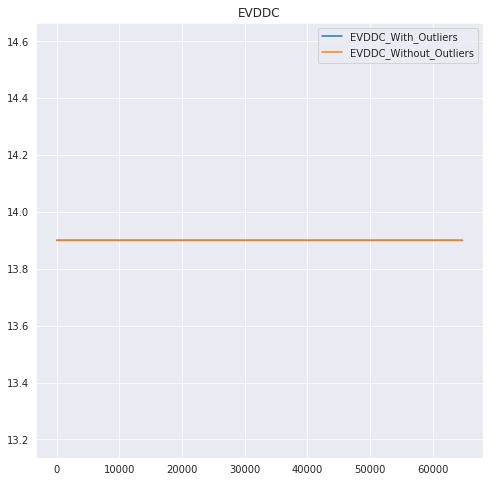

In [47]:
plt.plot(data["EVDDC"], label = "EVDDC_With_Outliers")
plt.plot(df["EVDDC"], label = "EVDDC_Without_Outliers")
plt.legend()
plt.title("EVDDC")
plt.show()

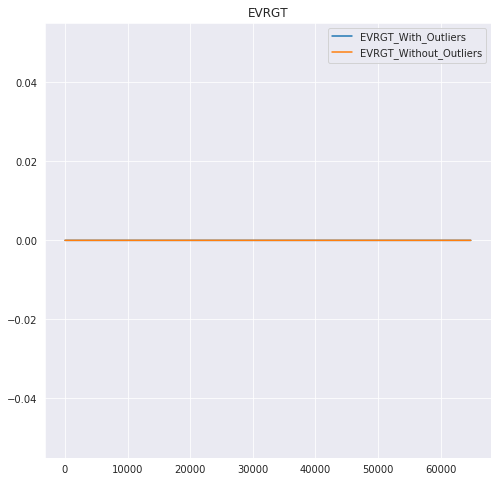

In [48]:
plt.plot(data["EVRGT"], label = "EVRGT_With_Outliers")
plt.plot(df["EVRGT"], label = "EVRGT_Without_Outliers")
plt.legend()
plt.title("EVRGT")
plt.show()

In [71]:
a = data[data["EVBOA_MIN"] < -100]

In [75]:
a.to_csv("outlier_358272088715191_16_Jan.csv")

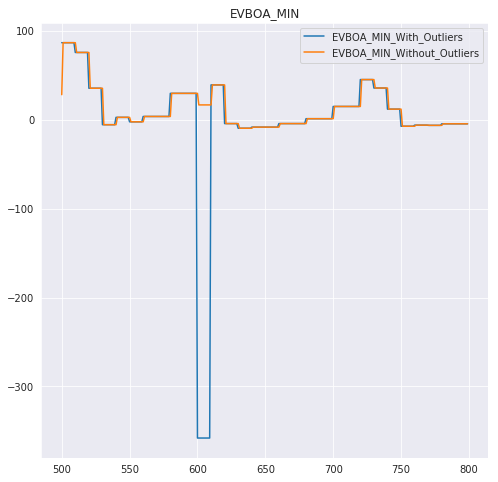

In [65]:
plt.plot(data["EVBOA_MIN"][500:800], label = "EVBOA_MIN_With_Outliers")
plt.plot(df["EVBOA_MIN"][500:800], label = "EVBOA_MIN_Without_Outliers")
plt.legend()
plt.title("EVBOA_MIN")
plt.show()

In [50]:
74*6

444

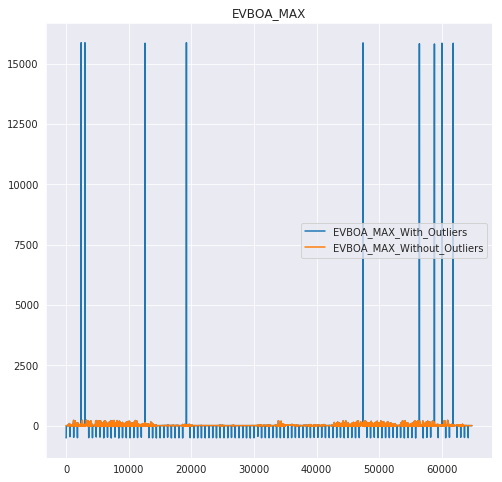

In [51]:
plt.plot(data["EVBOA_MAX"], label = "EVBOA_MAX_With_Outliers")
plt.plot(df["EVBOA_MAX"], label = "EVBOA_MAX_Without_Outliers")
plt.legend()
plt.title("EVBOA_MAX")
plt.show()

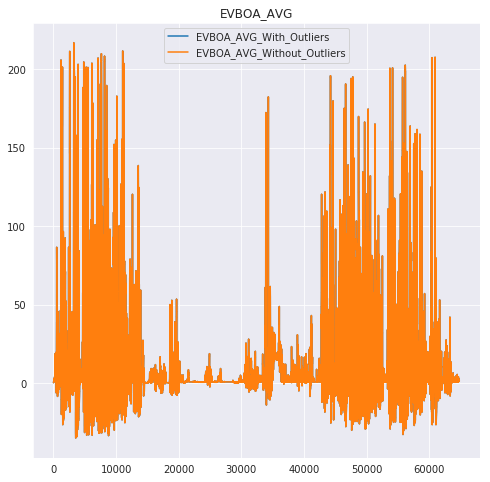

In [52]:
plt.plot(data["EVBOA_AVG"], label = "EVBOA_AVG_With_Outliers")
plt.plot(df["EVBOA_AVG"], label = "EVBOA_AVG_Without_Outliers")
plt.legend()
plt.title("EVBOA_AVG")
plt.show()

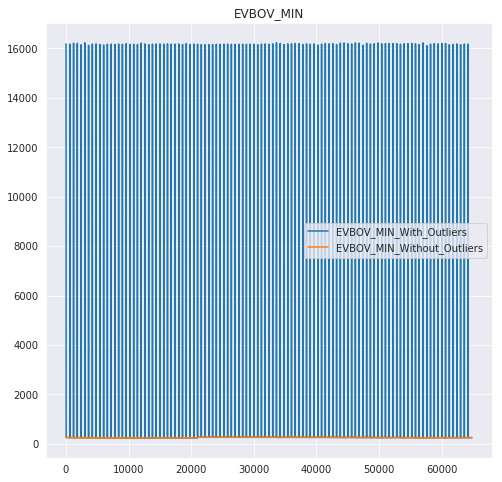

In [53]:

plt.plot(data["EVBOV_MIN"], label = "EVBOV_MIN_With_Outliers")
plt.plot(df["EVBOV_MIN"], label = "EVBOV_MIN_Without_Outliers")
plt.legend()
plt.title("EVBOV_MIN")
plt.show()

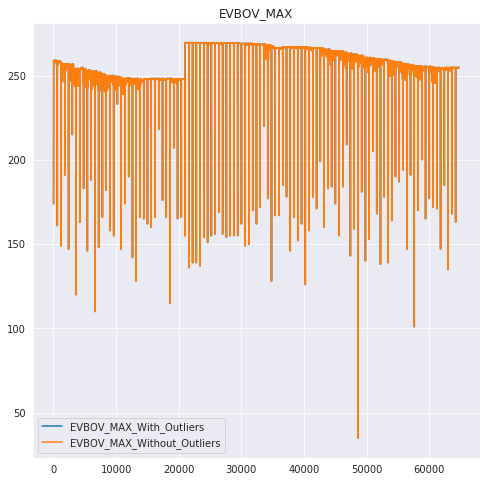

In [54]:
plt.plot(data["EVBOV_MAX"], label = "EVBOV_MAX_With_Outliers")
plt.plot(df["EVBOV_MAX"], label = "EVBOV_MAX_Without_Outliers")
plt.legend()
plt.title("EVBOV_MAX")
plt.show()

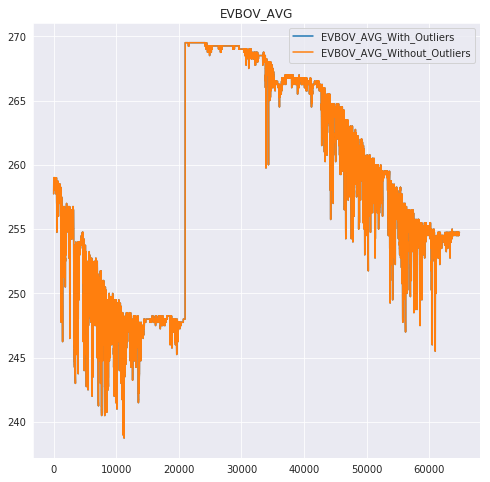

In [55]:
plt.plot(data["EVBOV_AVG"], label = "EVBOV_AVG_With_Outliers")
plt.plot(df["EVBOV_AVG"], label = "EVBOV_AVG_Without_Outliers")
plt.legend()
plt.title("EVBOV_AVG")
plt.show()

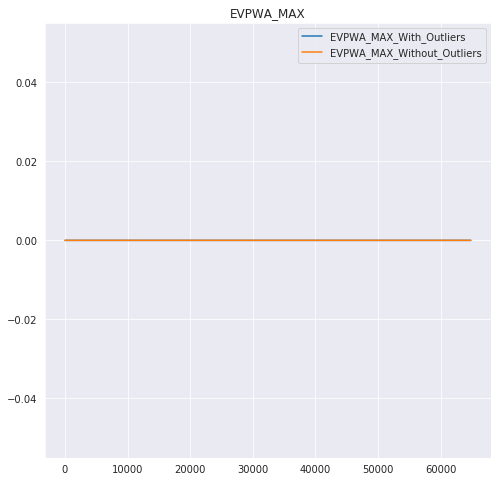

In [56]:
plt.plot(data["EVPWA_MAX"], label = "EVPWA_MAX_With_Outliers")
plt.plot(df["EVPWA_MAX"], label = "EVPWA_MAX_Without_Outliers")
plt.legend()
plt.title("EVPWA_MAX")
plt.show()

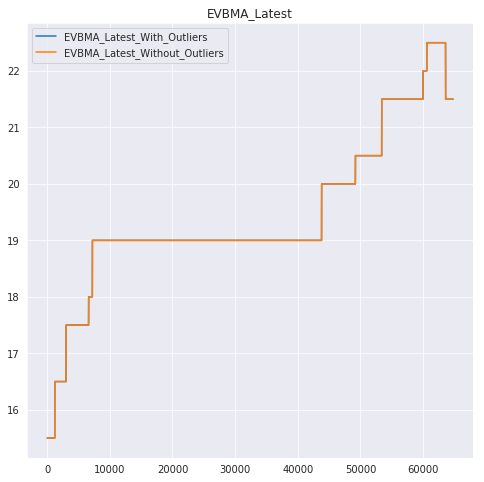

In [57]:
plt.plot(data["EVBMA_Latest"], label = "EVBMA_Latest_With_Outliers")
plt.plot(df["EVBMA_Latest"], label = "EVBMA_Latest_Without_Outliers")
plt.legend()
plt.title("EVBMA_Latest")
plt.show()

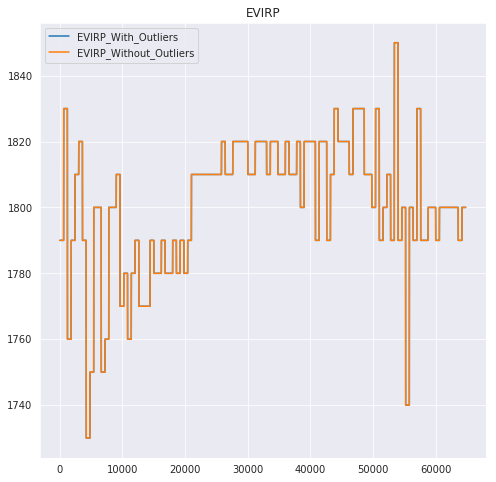

In [58]:
plt.plot(data["EVIRP"], label = "EVIRP_With_Outliers")
plt.plot(df["EVIRP"], label = "EVIRP_Without_Outliers")
plt.legend()
plt.title("EVIRP")
plt.show()

---